# Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D , Flatten, Dense, BatchNormalization , Dropout 
from tensorflow.keras.models import load_model
import cv2

# Load the dataset 

In [8]:
# Load the dataset
x_train = pd.read_csv('C:/Users/admin/Downloads/sign_mnist_train.csv')
x_test = pd.read_csv('C:/Users/admin/Downloads/sign_mnist_test.csv')

print("X train dataset:\n",x_train.head(10))
print("\nX test dataset:\n",x_test.head(10))

# Check the size of the datasets
train_data_size = x_train.shape[0]
test_data_size = x_test.shape[0]

print("Training data size:", train_data_size)
print("Testing data size:", test_data_size)

X train dataset:
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   
5     16     161     168     172     173     178     184     189     193   
6      8     134     134     135     135     136     137     137     138   
7     22     114      42      74      99     104     109     117     127   
8      3     169     174     176     180     183     185     187     188   
9      3     189     189     189     190     190     191     190     190   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206   

# Preprocessing Data

In [9]:

# Extract labels and convert to one-hot encoding
y_train = x_train['label']
y_test = x_test['label']
del x_train['label']
del x_test['label']

print("X train after extract label:\n",x_train.head())
print("\nX test after extract label:\n",x_test.head())

X train after extract label:
    pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     107     118     127     134     139     143     146     150     153   
1     155     157     156     156     156     157     156     158     158   
2     187     188     188     187     187     186     187     188     187   
3     211     211     212     212     211     210     211     210     210   
4     164     167     170     172     176     179     180     184     185   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      156  ...       207       207       207       207       206       206   
1      157  ...        69       149       128        87        94       163   
2      186  ...       202       201       200       199       198       199   
3      211  ...       235       234       233       231       230       226   
4      186  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783 

In [10]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)  # Use transform

# Convert to numpy arrays and normalize
x_train = x_train.values
x_test = x_test.values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data for Conv2D
x_train = x_train.reshape(-1, 28, 28, 1).astype(np.float32)
x_test = x_test.reshape(-1, 28, 28, 1).astype(np.float32)


In [11]:
print("\nX train after preprocessing:\n",x_train,"\n\nX test after preprocessing:\n",x_test)


X train after preprocessing:
 [[[[0.41960785]
   [0.4627451 ]
   [0.49803922]
   ...
   [0.6666667 ]
   [0.6666667 ]
   [0.6627451 ]]

  [[0.43529412]
   [0.4745098 ]
   [0.5058824 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.6666667 ]]

  [[0.44313726]
   [0.48235294]
   [0.5137255 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.67058825]]

  ...

  [[0.5568628 ]
   [0.5882353 ]
   [0.62352943]
   ...
   [0.7921569 ]
   [0.7882353 ]
   [0.78431374]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]]


 [[[0.60784316]
   [0.6156863 ]
   [0.6117647 ]
   ...
   [0.5411765 ]
   [0.36078432]
   [0.42352942]]

  [[0.61960787]
   [0.62352943]
   [0.62352943]
   ...
   [0.5568628 ]
   [0.45490196]
   [0.56078434]]

  [[0.6313726 ]
   [0.6313726 ]
   [0.6313726 ]
   ...
   [0.5764706 ]
   [0.49019608]
   [0.54901963]]

  ...

  [[0.63

In [12]:
print("Y train:\n",y_train,"\n\nY test:\n",y_test)

Y train:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]] 

Y test:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


# Convert and save data in the form of images

In [13]:
# Extract pixel values (features) and labels from the dataset
pixels = x_test[:, 1:]
labels = x_test[:, 0]

# # Convert pixel values to NumPy array
images = np.array(pixels)

# # Define a directory to save the images
# save_dir = 'saved_images/'

# # Create the directory if it doesn't exist
# import os
# os.makedirs(save_dir, exist_ok=True)

# # Loop through the images and save them
# for idx in range(len(images)):
#     plt.imshow(images[idx], cmap='gray')
#     plt.title(f'Label: {labels[idx]}')
    
#     # Save the image with a unique filename based on its index
#     filename = os.path.join(save_dir, f'image_{idx}.png')
#     plt.savefig(filename)
#     plt.clf()  # Clear the plot to display the next image



# Display saved data in the form of images

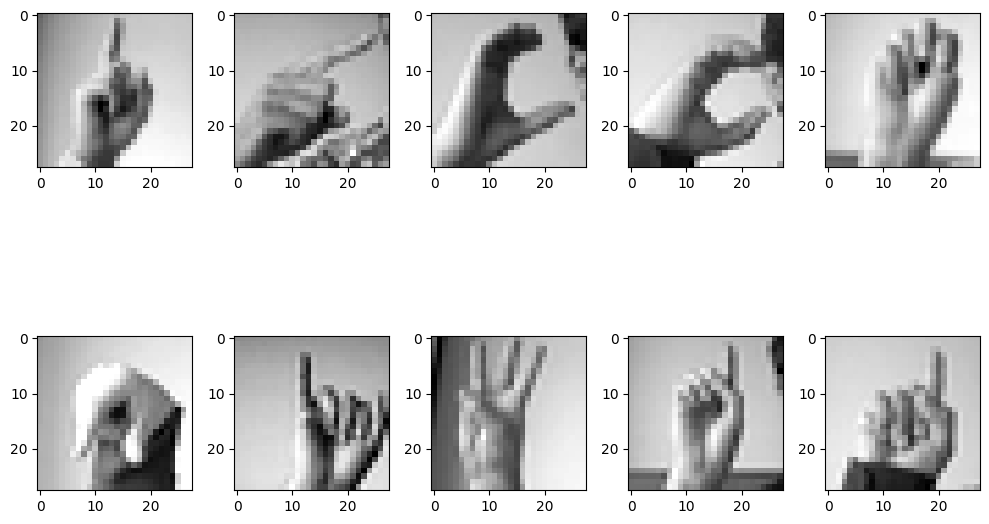

In [16]:
# display the images 
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()   

# Create a model

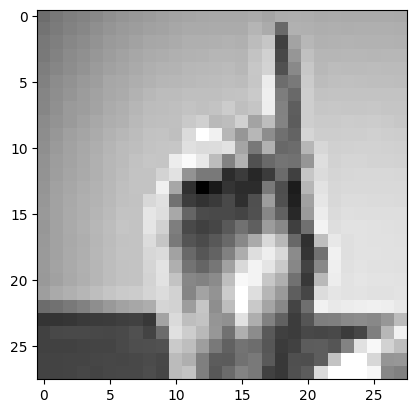

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [17]:

# Display an image
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :, :, 0], cmap='gray')  # Display the grayscale image
plt.show()

# Create the model
#Conv2D(noOfFilters,sizeOfFilter,activationFun,shapeOfInput)
#MaxPooling(filterSize)
#Dense(noOfNewron,activationfun)


model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()


# Train the model

In [20]:
# Train the model
from sklearn.model_selection import train_test_split

# # Split your data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

history=model.fit(x_train, y_train, epochs=20, batch_size=150)

Epoch 1/20
147/147 [==============================] - 64s 438ms/step - loss: 5.0613e-04 - accuracy: 0.9996
Epoch 2/20
147/147 [==============================] - 69s 471ms/step - loss: 3.5866e-04 - accuracy: 0.9997
Epoch 3/20
147/147 [==============================] - 64s 433ms/step - loss: 4.8086e-04 - accuracy: 0.9997
Epoch 4/20
147/147 [==============================] - 66s 449ms/step - loss: 1.4621e-04 - accuracy: 1.0000
Epoch 5/20
147/147 [==============================] - 67s 453ms/step - loss: 1.4861e-04 - accuracy: 1.0000
Epoch 6/20
147/147 [==============================] - 67s 455ms/step - loss: 9.7872e-05 - accuracy: 1.0000
Epoch 7/20
147/147 [==============================] - 68s 460ms/step - loss: 1.3431e-04 - accuracy: 1.0000
Epoch 8/20
147/147 [==============================] - 65s 439ms/step - loss: 9.5097e-05 - accuracy: 0.9999
Epoch 9/20
147/147 [==============================] - 64s 438ms/step - loss: 1.4844e-04 - accuracy: 0.9998
Epoch 10/20
147/147 [================

# Save the training data

In [70]:
model.save('trained_model1_sigmoid.h5')

In [21]:
# predict on validation set
Y_pred= model.predict(x_test)

#predicted and oriinal class
Y_pred_class = np.argmax(Y_pred, axis=1)
Y_test_class = np.argmax(y_test, axis=1)

# accuracy calculation
val_acc = np.mean(Y_pred_class == Y_test_class)

# print the accuracy
print("Validation accuracy: ", val_acc, "\n")

225/225 [==============================] - 6s 25ms/step
Validation accuracy:  0.9665365309537088 



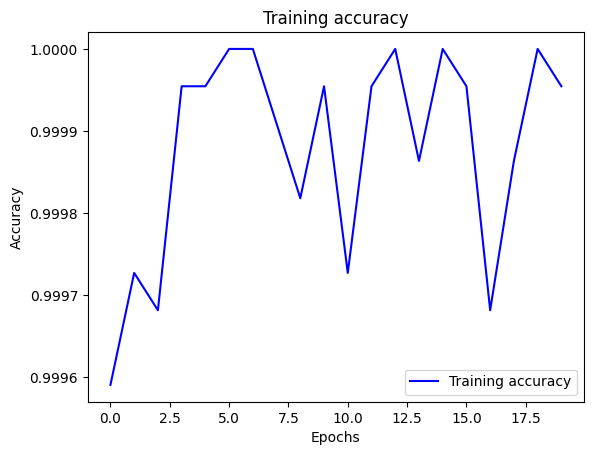

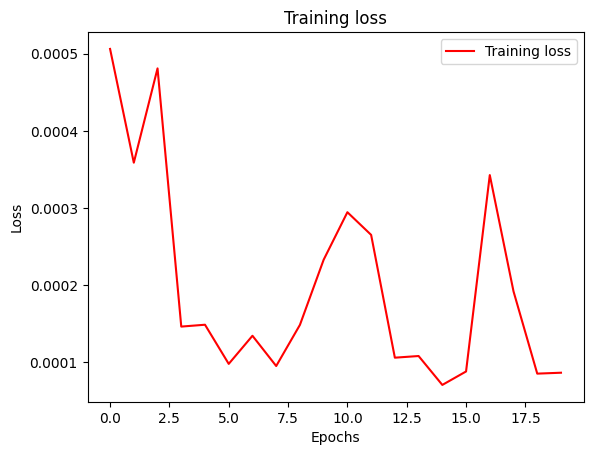

In [35]:
# plots for accuracy and Loss with epochs
acc = history.history['accuracy']
loss = history.history['loss']

# Plotting accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plotting loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

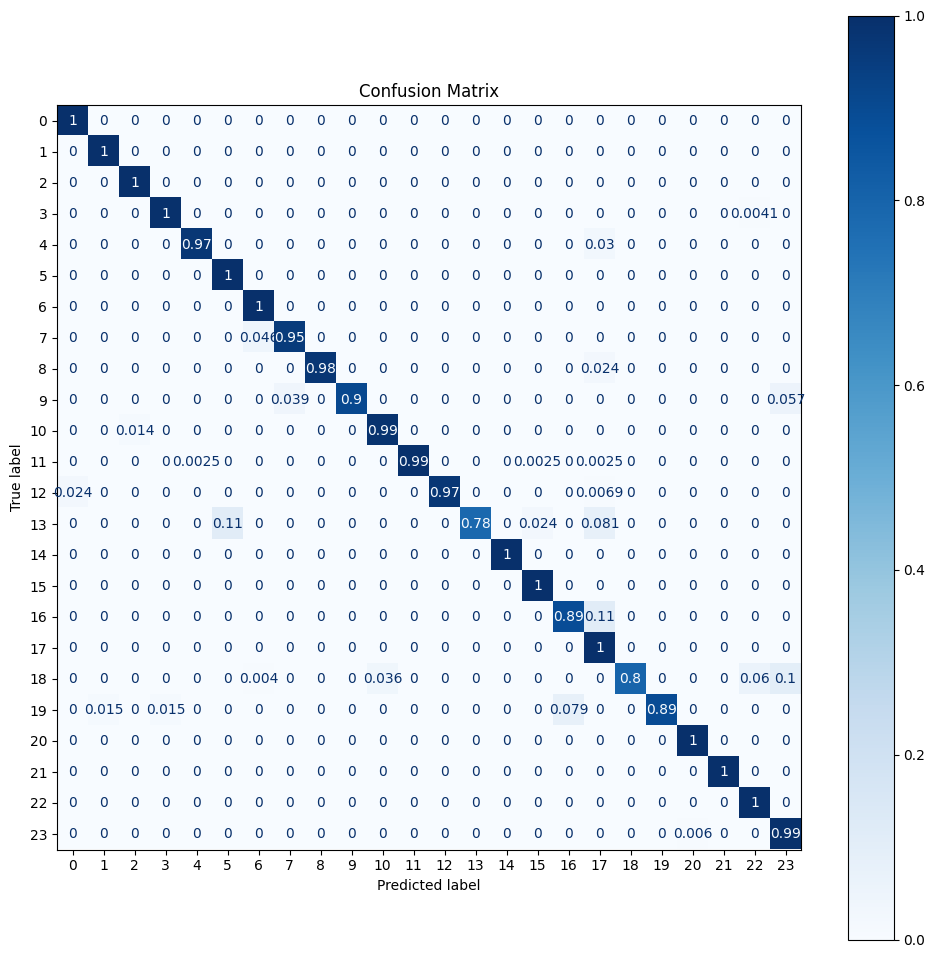

In [31]:
# plot the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

fig, ax = plt.subplots(figsize=(12, 12))
cm = confusion_matrix(Y_test_class,Y_pred_class, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(ax=ax,cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix")
plt.show()

# Testing Images on trained model

# Testing random image from y_test dataset on trained model

In [22]:
model.evaluate(x_test,y_test)

225/225 [==============================] - 6s 26ms/step - loss: 0.0182 - accuracy: 0.9665


[0.0182378850877285, 0.9665365219116211]

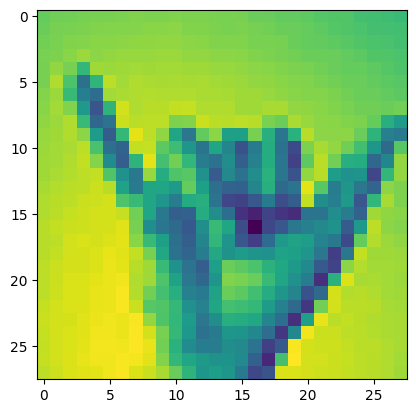

In [42]:
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

In [43]:
y_pred=model.predict(x_test[idx2,:].reshape(-1,28,28,1))
print(y_pred)

alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

predicted_class_index = np.argmax(y_pred)
predicted_alphabet = alphabet[predicted_class_index]
print("\n\nPredicted alphabet:", predicted_alphabet)

1/1 [==============================] - 0s 388ms/step
[[2.3937748e-11 1.2266167e-19 7.8907386e-10 4.5255237e-11 3.1436113e-19
  2.2729414e-09 4.4299158e-11 4.3648371e-12 8.6494909e-09 2.6292868e-12
  3.3035583e-14 3.0059912e-14 1.4132778e-10 6.4973554e-11 5.1985832e-11
  2.5189091e-12 1.2861853e-18 3.7093809e-12 8.6880928e-14 1.4139191e-18
  5.7883345e-14 2.1964381e-18 1.5733304e-13 1.0000000e+00]]


Predicted alphabet: Y


# Testing random image from y_test dataset on saved (after training) model

In [39]:
# Load the saved model
loaded_model = load_model('trained_model1_sigmoid.h5')

# Print the summary of the loaded model
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

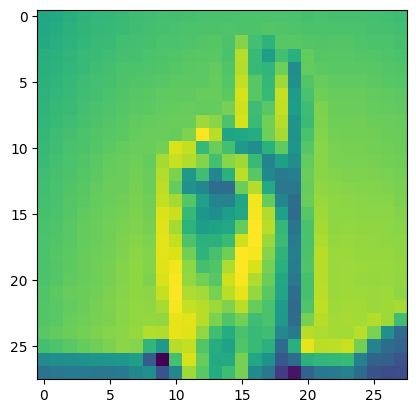

In [48]:
idx3=random.randint(0,len(y_test))
plt.imshow(x_test[idx3,:])
plt.show()

In [49]:
y_pred1=loaded_model.predict(x_test[idx3,:].reshape(-1,28,28,1))
print(y_pred1)

alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

predicted_class_index = np.argmax(y_pred1)
predicted_alphabet = alphabet[predicted_class_index]
print("\n\nPredicted alphabet:", predicted_alphabet)

1/1 [==============================] - 0s 88ms/step
[[2.70808614e-12 4.15496459e-07 7.34730402e-11 3.48171307e-04
  6.99264078e-08 7.15527859e-10 7.47749151e-09 1.65745525e-11
  3.33424018e-11 1.95319581e-06 9.82727927e-11 6.05064221e-09
  1.11130355e-07 1.77957177e-10 2.96860342e-10 1.40767198e-09
  2.10975429e-07 3.54258987e-08 7.19225346e-09 3.40699822e-01
  4.01652733e-06 5.74270507e-06 4.90618618e-07 7.48509947e-08]]


Predicted alphabet: U


# Testing downloaded image on trained model (on trainde_model.h5)

# Reading the image

In [156]:
testImg=(cv2.imread('img2test.jpeg'))

# Display the processed image
# cv2.imshow('Processed Image', gray_image)

# # Wait for a key press and then close the window
# cv2.waitKey(0)

# Preprocessing and Predicting Processed image

1/1 [==============================] - 0s 25ms/step
[[1.0781644e-03 2.2029922e-10 2.7109776e-04 5.4739010e-01 2.4923877e-10
  1.9424797e-04 7.6276725e-03 1.0109070e-02 3.9839492e-07 8.5368061e-01
  1.4153194e-03 3.9247967e-05 9.9970382e-01 3.2327175e-06 9.8878086e-01
  9.8330484e-06 1.2282844e-06 2.1886441e-03 9.1614343e-02 4.0458002e-05
  3.4242825e-04 2.2513458e-07 2.4655044e-06 1.0000000e+00]]


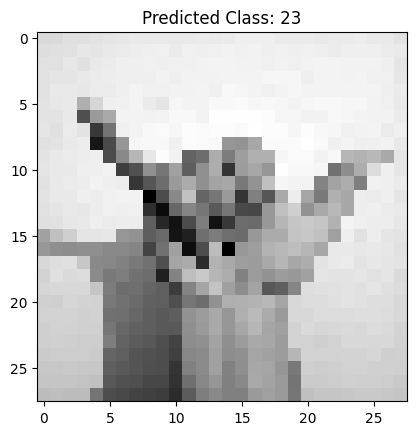



Predicted alphabet: Y


In [18]:
testImg=(cv2.imread('img2test.jpeg'))
# Preprocess the image
processed_image = cv2.cvtColor(testImg, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
processed_image = cv2.resize(processed_image, (28, 28))  # Resize to 28x28
processed_image = processed_image.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0  # Normalize

#predict the processed image
y_predtest=(loaded_model.predict(processed_image))
print(y_predtest)

predicted_class_index = np.argmax(y_predtest)

# Display the image and prediction
plt.imshow(processed_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Class: {predicted_class_index}')
plt.show()

predicted_alphabet = alphabet[predicted_class_index]
print("\n\nPredicted alphabet:", predicted_alphabet)

# Testing real time data on trained model

In [6]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import mediapipe as mp

# Load your trained model
model = load_model('trained_model1_sigmoid.h5')

# Define the alphabet
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils

# Initialize the video capture
cap = cv2.VideoCapture(0)  # Use the default camera (you can change the index if you have multiple cameras)

while True:
    _, frame = cap.read()
    
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Use MediaPipe Hands to detect hands
    results = hands.process(frame)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Extract hand region
            x_min, x_max, y_min, y_max = frame.shape[1], 0, frame.shape[0], 0

            for lm in hand_landmarks.landmark:
                x, y, _ = int(lm.x * frame.shape[1]), int(lm.y * frame.shape[0]), lm.z
                if x < x_min:
                    x_min = x
                if x > x_max:
                    x_max = x
                if y < y_min:
                    y_min = y
                if y > y_max:
                    y_max = y

            # Extract hand region from grayscale frame
            hand_region = gray_frame[y_min:y_max, x_min:x_max]

            # Preprocess the hand region
            hand_region = cv2.resize(hand_region, (28, 28))
            hand_region = hand_region / 255.0
            hand_region = hand_region.reshape(-1, 28, 28, 1)

            # Make a prediction using your trained model
            prediction = model.predict(hand_region)
            predicted_class = np.argmax(prediction)
            predicted_letter = alphabet[predicted_class]

            # Draw hand landmarks and predicted letter on the frame
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            cv2.putText(frame, f'Predicted: {predicted_letter}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the frame
    cv2.imshow('Sign Language Detection', frame)

    # Exit the loop by pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 41ms/step
